<a href="https://colab.research.google.com/github/hichamtalha/Ondelettes/blob/main/Ondelettes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

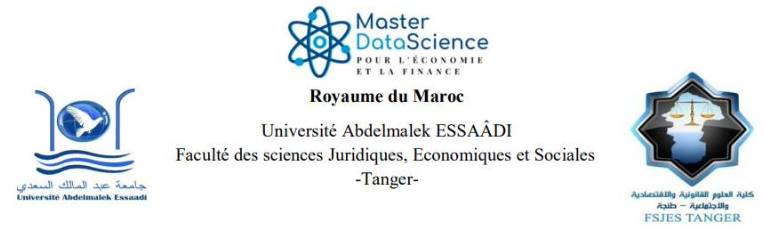


Réalisé par : Hicham TALHA

Enacdré par : Mr. Abdelhak TALI

#Prédiction prix d'action d'Amazon

Ce code effectue une analyse des ondelettes et une modélisation autorégressive (AR) pour faire des prédictions sur une série temporelle de prix d'actions d’Amazon.

[*********************100%***********************]  1 of 1 completed
Prediction for the approximation: [507.09656618 508.07208018 507.31172199 516.57862285 523.65254316
 529.29819379 531.17136838 529.10390939 530.14180898 531.56497326
 533.61696925 535.75368329 536.16524254 536.59415643 536.9825483
 537.7241891  538.90058751 539.74083704 540.51166639 541.10653648
 541.66824154 542.42090497 543.16539251 543.93126763 544.64613327
 545.29738126 545.97725237 546.65956654 547.36629538 548.07613135
 548.76273802 549.44712405 550.12395043 550.80544074 551.49318717
 552.17679984 552.85904906 553.5361077  554.21092715 554.88663015
 555.56115205 556.23536447 556.90745578 557.57724562 558.2458431
 558.91297162 559.5792458  560.24428087 560.90772564 561.56977179]


<Figure size 1200x800 with 0 Axes>

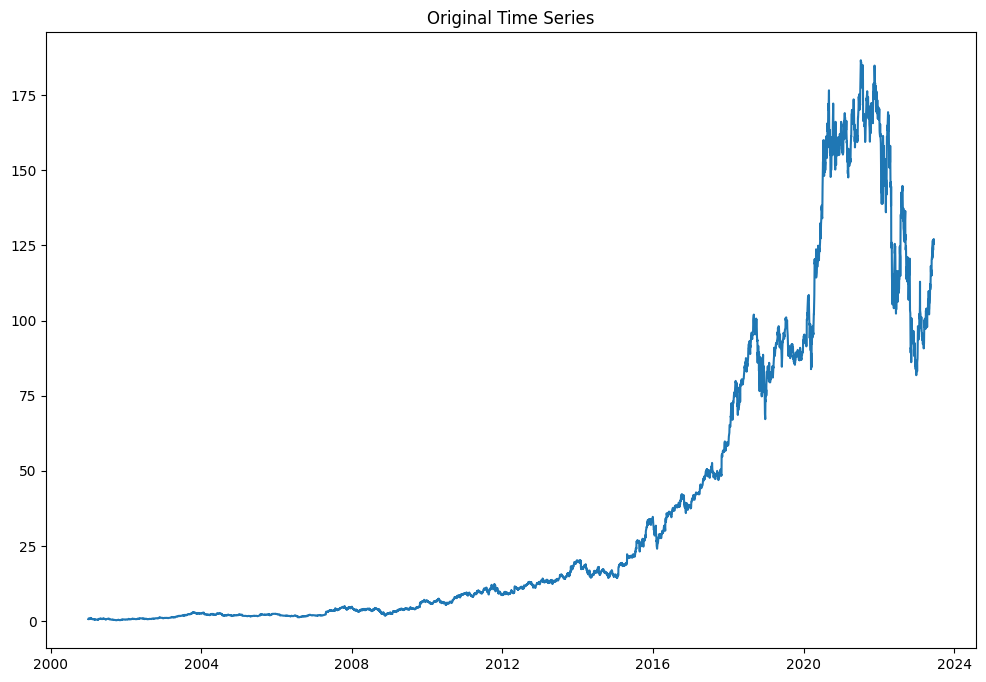

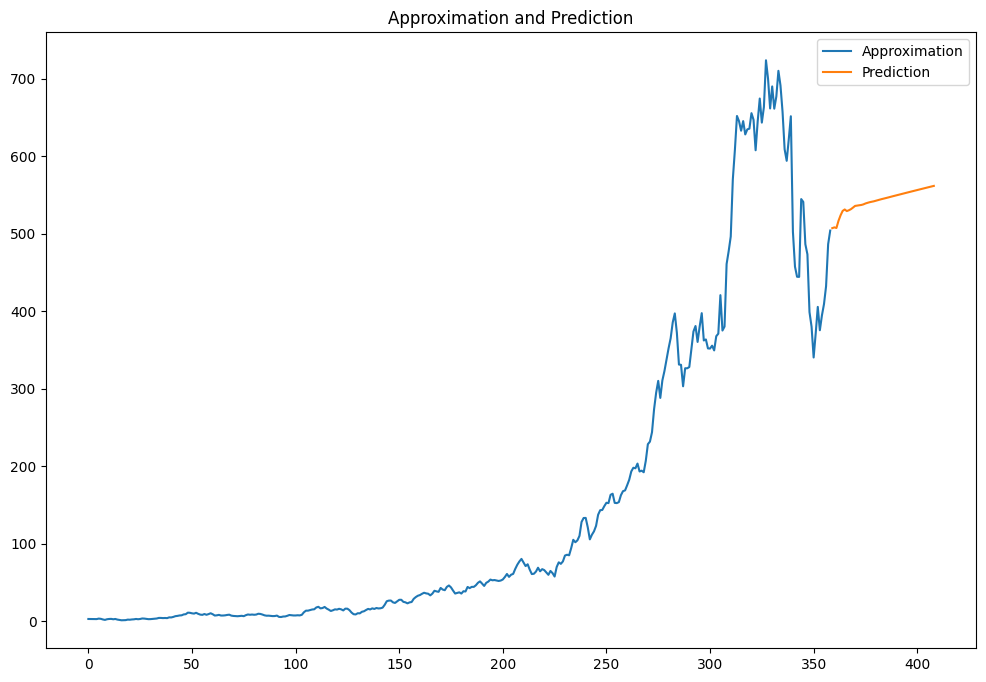

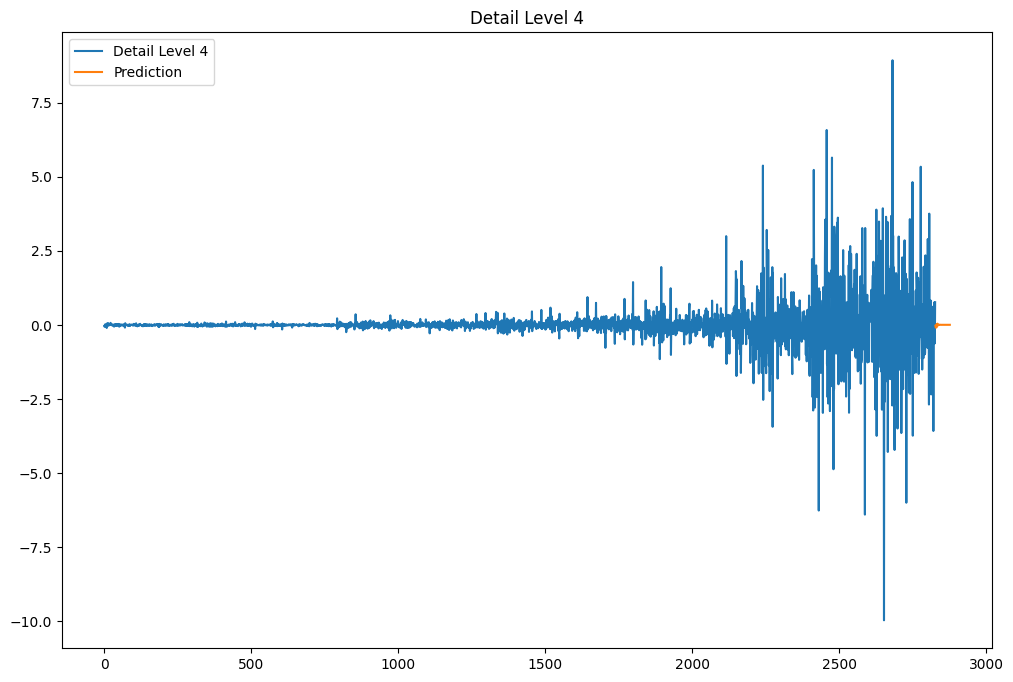

Mean of Level Predictions: [-0.02437754 -0.08429426 -0.08724248 -0.08370992  0.02765613  0.01521682
 -0.04684344  0.04547562  0.0248423   0.00928113  0.00569035 -0.00252594
  0.003554    0.00649519  0.00158381  0.00705517  0.00816597  0.00734848
  0.00713655  0.00604919  0.00593038  0.00618987  0.00582468  0.00608972
  0.00632239  0.00635739  0.00639843  0.00632725  0.00627358  0.00627335
  0.00623709  0.0062378   0.00625716  0.00626756  0.00627855  0.00627941
  0.00627527  0.00627376  0.00626981  0.00626754  0.00626787  0.00626859
  0.00626989  0.00627073  0.00627084  0.00627085  0.00627055  0.00627021
  0.00627005  0.00627   ]


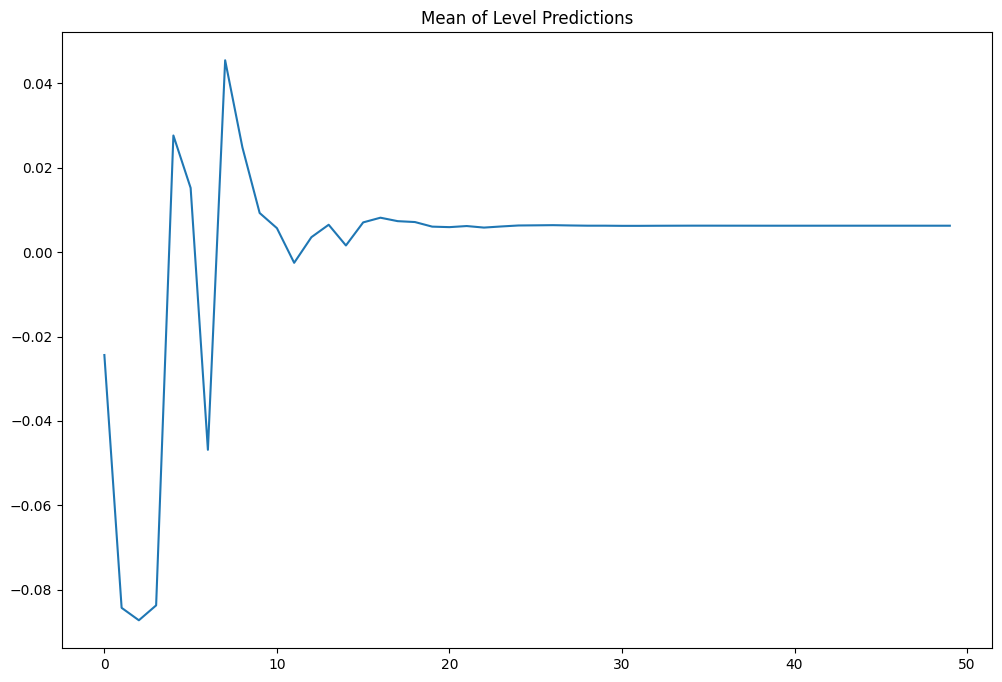

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.ar_model import AutoReg

# Specify the stock symbol you want to import
symbol = "AMZN"

# Use the yfinance `download` function to get the data
data = yf.download(symbol, start="2001-01-01", end="2023-06-20")

# Select only the "Adj Close" column
adj_close = data["Adj Close"]

# Convert to a numpy time series
adj_close_np = adj_close.to_numpy()

# Wavelet choice
wavelet = 'db4'  # Using Daubechies 4 wavelet

# Decomposition level
level = 4

# Wavelet decomposition
coeffs = pywt.wavedec(adj_close_np, wavelet, level=level)

# Retrieve the approximation and details
approximation = coeffs[0]
details = coeffs[1:]

# AutoReg prediction for the approximation
model_approx = AutoReg(approximation, lags=10)  # Increase the number of lag variables to 10
model_approx_fit = model_approx.fit()

# Prediction for the next time steps
start_index_approx = len(approximation)
end_index_approx = start_index_approx + 49  # Prediction for 50 future values
prediction_approx = model_approx_fit.predict(start=start_index_approx, end=end_index_approx)

# Display the prediction results for the approximation
print("Prediction for the approximation:", prediction_approx)

# Plot
plt.figure(figsize=(12, 8))

# Original time series
plt.figure(figsize=(12, 8))
plt.plot(adj_close)
plt.title("Original Time Series")
plt.show()

# Approximation and prediction
plt.figure(figsize=(12, 8))
plt.plot(approximation, label="Approximation")
plt.plot(np.arange(len(approximation), len(approximation)+50), prediction_approx, label="Prediction")
plt.title("Approximation and Prediction")
plt.legend()
plt.show()

# Details and predictions
predictions = []  # Store the predictions for each detail level
for i, detail_level in enumerate(details):
  model_detail = AutoReg(detail_level, lags=10)  # Increase the number of lag variables to 10 for the details
  model_detail_fit = model_detail.fit()

# Prediction for the next time steps
start_index_detail = len(detail_level)
end_index_detail = start_index_detail + 49  # Prediction for 50 future values
prediction_detail = model_detail_fit.predict(start=start_index_detail, end=end_index_detail)
predictions.append(prediction_detail)

# Plot the detail level and its prediction
plt.figure(figsize=(12, 8))
plt.plot(detail_level, label="Detail Level {}".format(i+1))
plt.plot(np.arange(len(detail_level), len(detail_level)+50), prediction_detail, label="Prediction")
plt.title("Detail Level {}".format(i+1))
plt.legend()
plt.show()

# Mean of the level predictions
predictions_mean = np.mean(predictions, axis=0)

# Display the mean of predictions
print("Mean of Level Predictions:", predictions_mean)

# Plot the mean of predictions
plt.figure(figsize=(12, 8))
plt.plot(predictions_mean)
plt.title("Mean of Level Predictions")
plt.show()